In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

sns.set(style="ticks", color_codes=True)


basepath = "/home/wajih/DataScience/Data-Science-Project"

ibm_data = pd.read_csv(basepath + "/ibm.csv")
xyz_data = pd.read_csv(basepath + "/organization.csv")

fields_trim_ibm = ['EmployeeCount', 'Over18', 'EmployeeNumber', 'StandardHours']

print ibm_data['PerformanceRating'].describe()

# g = sns.pairplot(dt)
# plt.show()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64


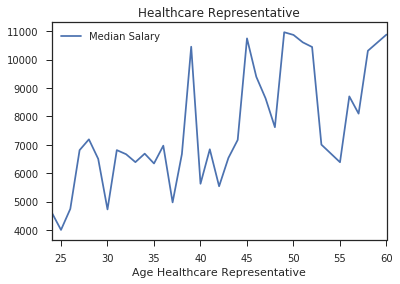

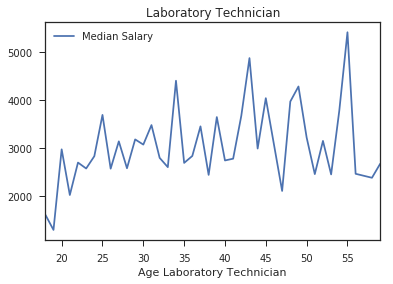

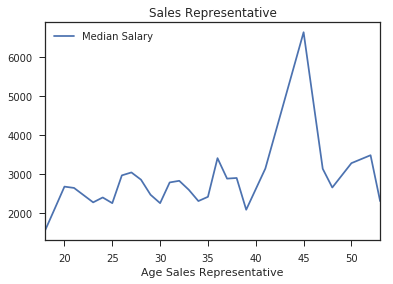

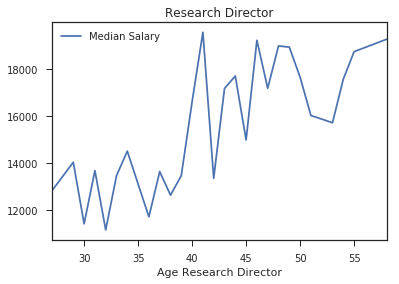

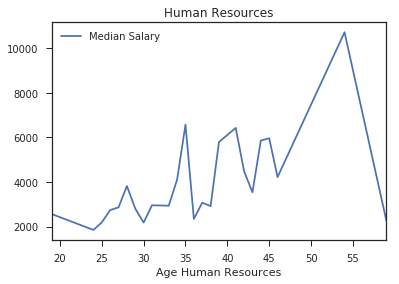

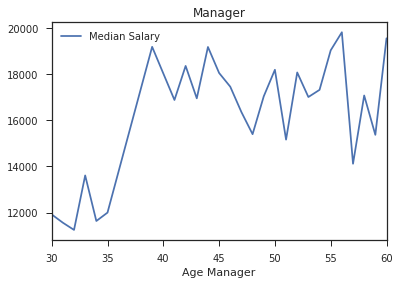

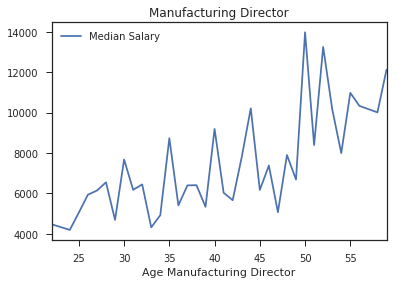

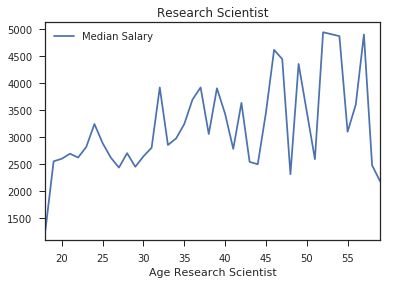

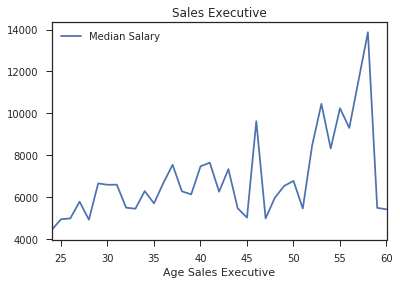

In [3]:
%matplotlib inline
# Employee Salaries by Job Roles
def salary_by_jobrole(df):
    for job in set(df.JobRole):
        agesalary = []
        for i in range(df['Age'].min(), df['Age'].max() + 1):
            agesalary.append([i, df[(df['Age'] == i) & (df['JobRole'] == job)]['MonthlyIncome'].median()])
        agesalary = pd.DataFrame(agesalary, columns=['Age '+job, 'Median Salary'])
        agesalary = agesalary.dropna().reset_index(drop=True)
    
        agesalary.plot(x='Age '+job, y='Median Salary', title=job)

salary_by_jobrole(ibm_data)


In [4]:
#Remove useless columns
ibm_df = copy.deepcopy(ibm_data)

for col in fields_trim_ibm:
    ibm_df = ibm_df.drop(col, 1)


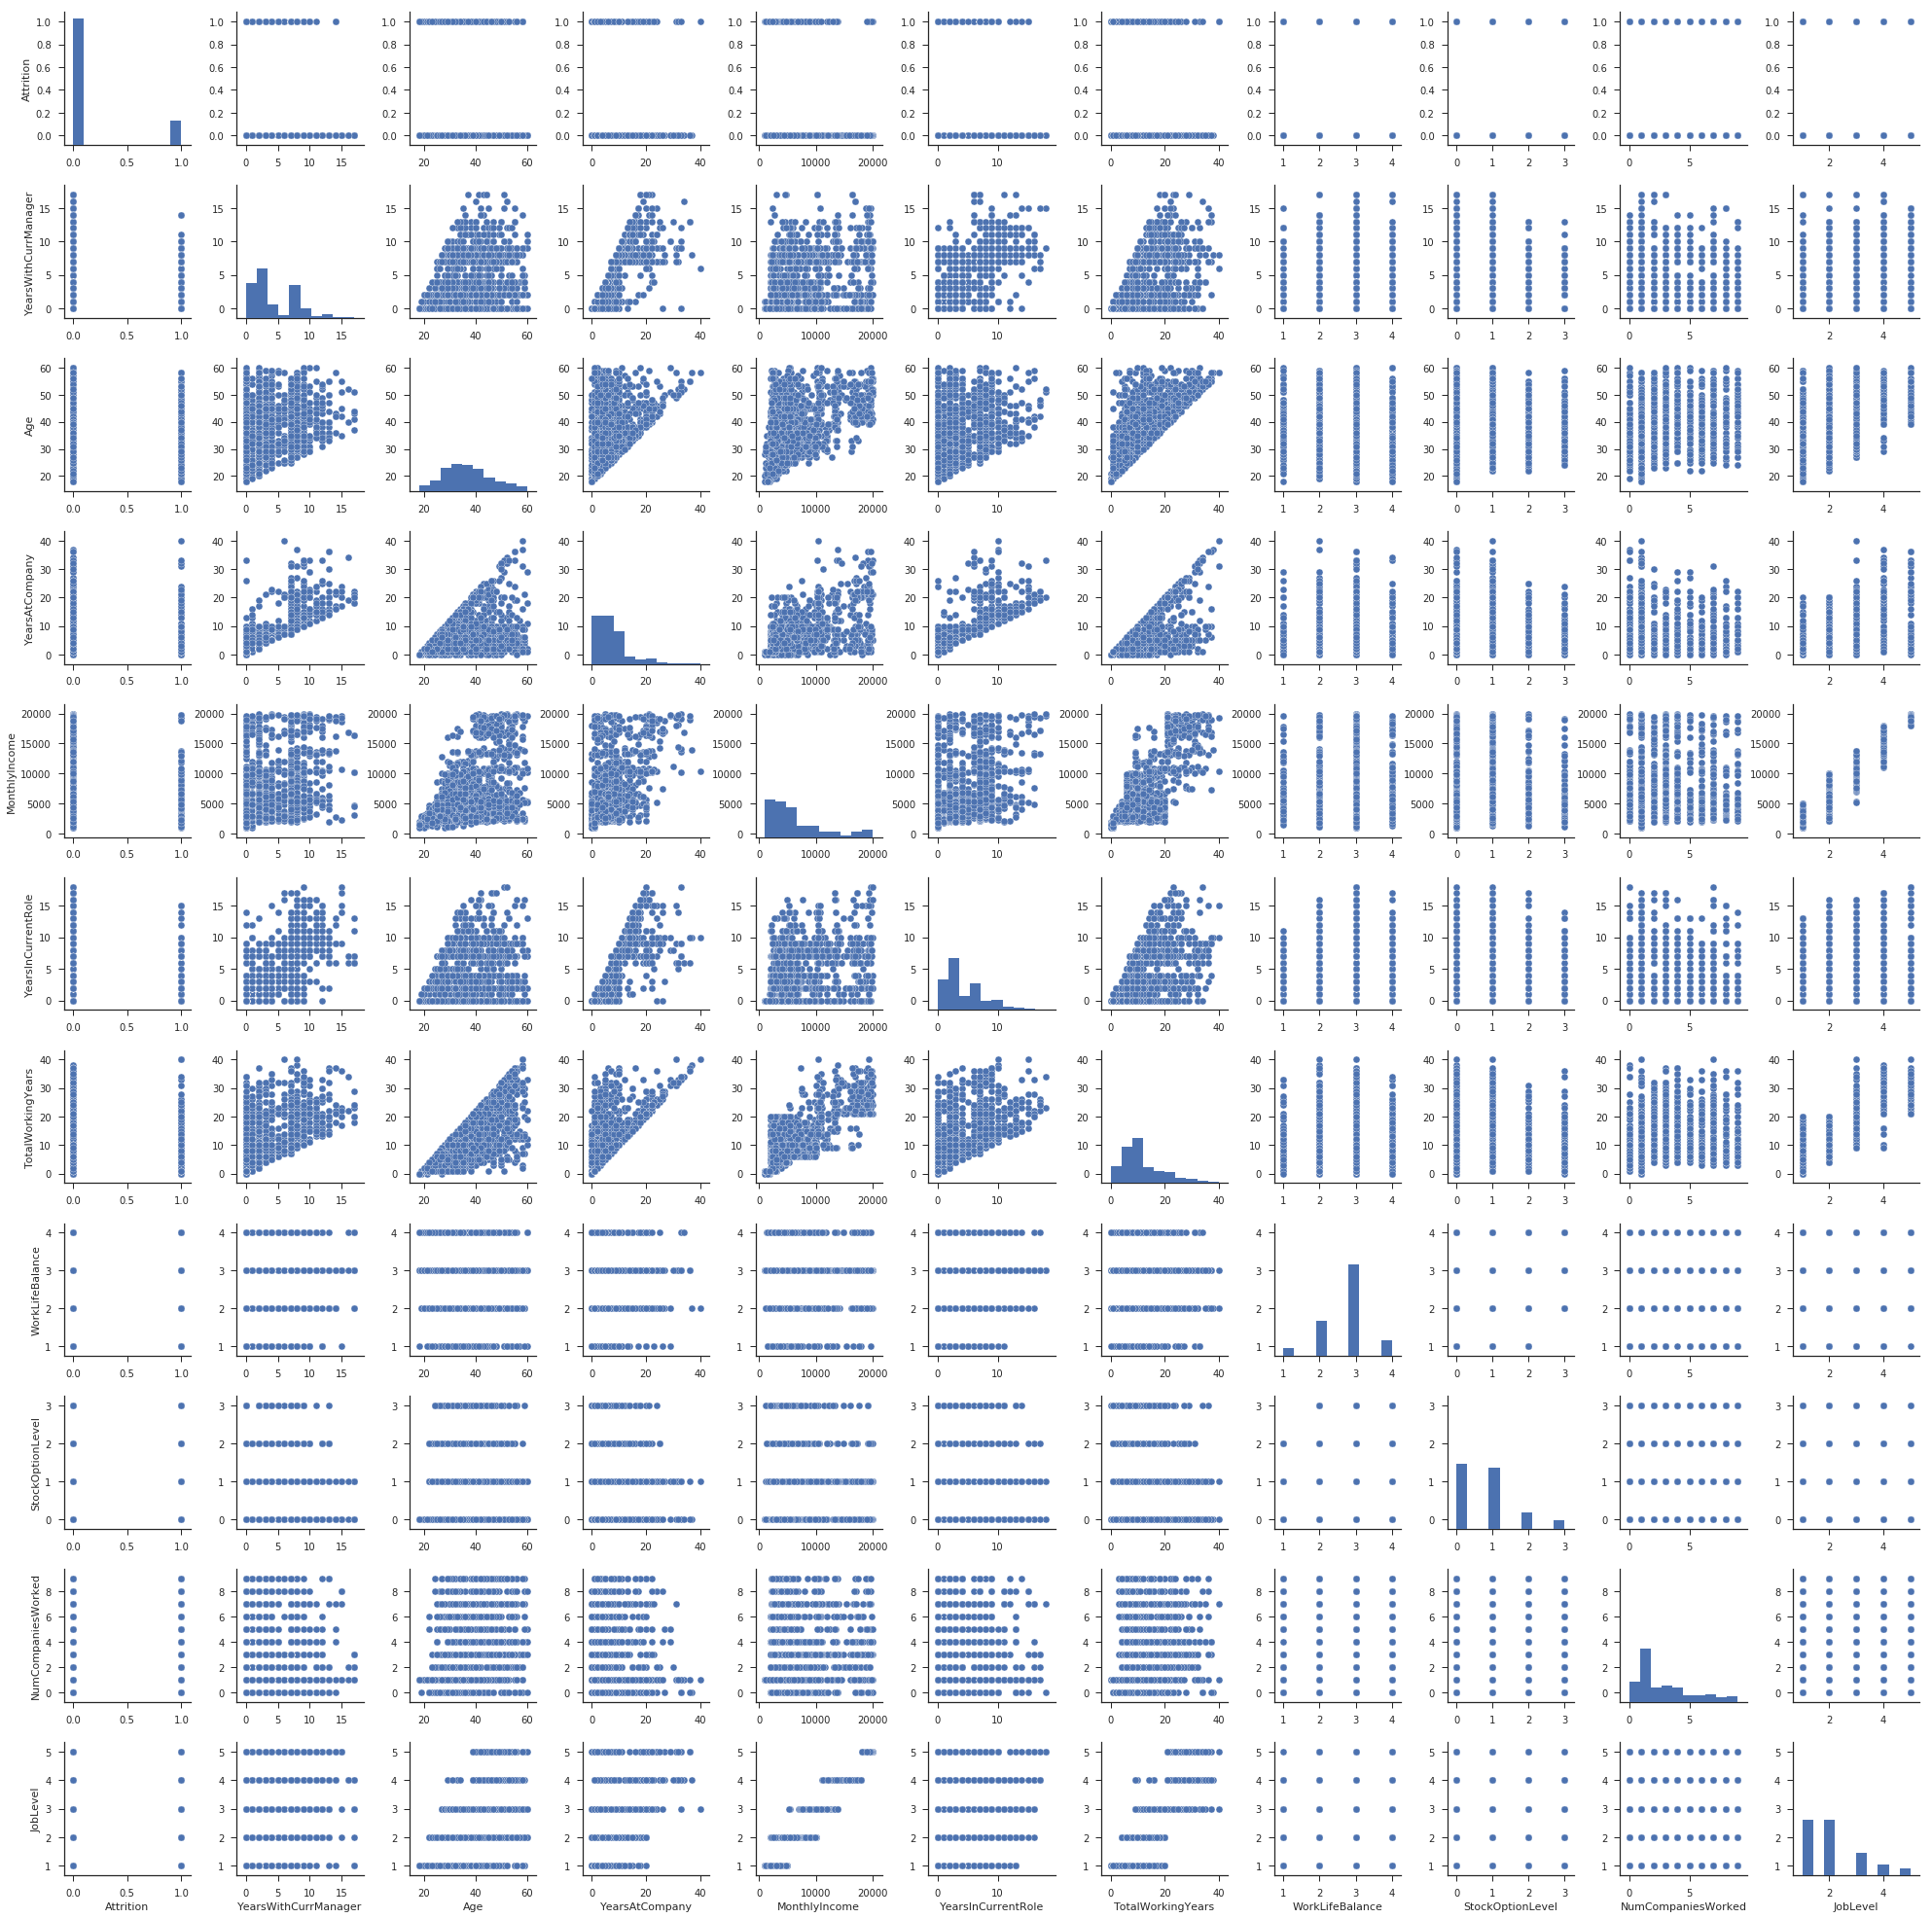

In [5]:
# Pairwise plots
# print ibm_df[['Attrition', 'MaritalStatus']]
ibm_df.Attrition  = pd.Categorical(ibm_df.Attrition).codes
ibm_df.MaritalStatus = pd.Categorical(ibm_df.MaritalStatus).codes

# Out of 35 columns these have some relations (Mentioned in ibm_analysis.txt)

columns_to_plot = ['Attrition', 'YearsWithCurrManager', 'Age', 'YearsAtCompany', 'MonthlyIncome', 
                   'YearsInCurrentRole', 'TotalWorkingYears', 'WorkLifeBalance', 'StockOptionLevel',
                  'NumCompaniesWorked', 'JobLevel']


g = sns.pairplot(ibm_df[columns_to_plot])
plt.show()


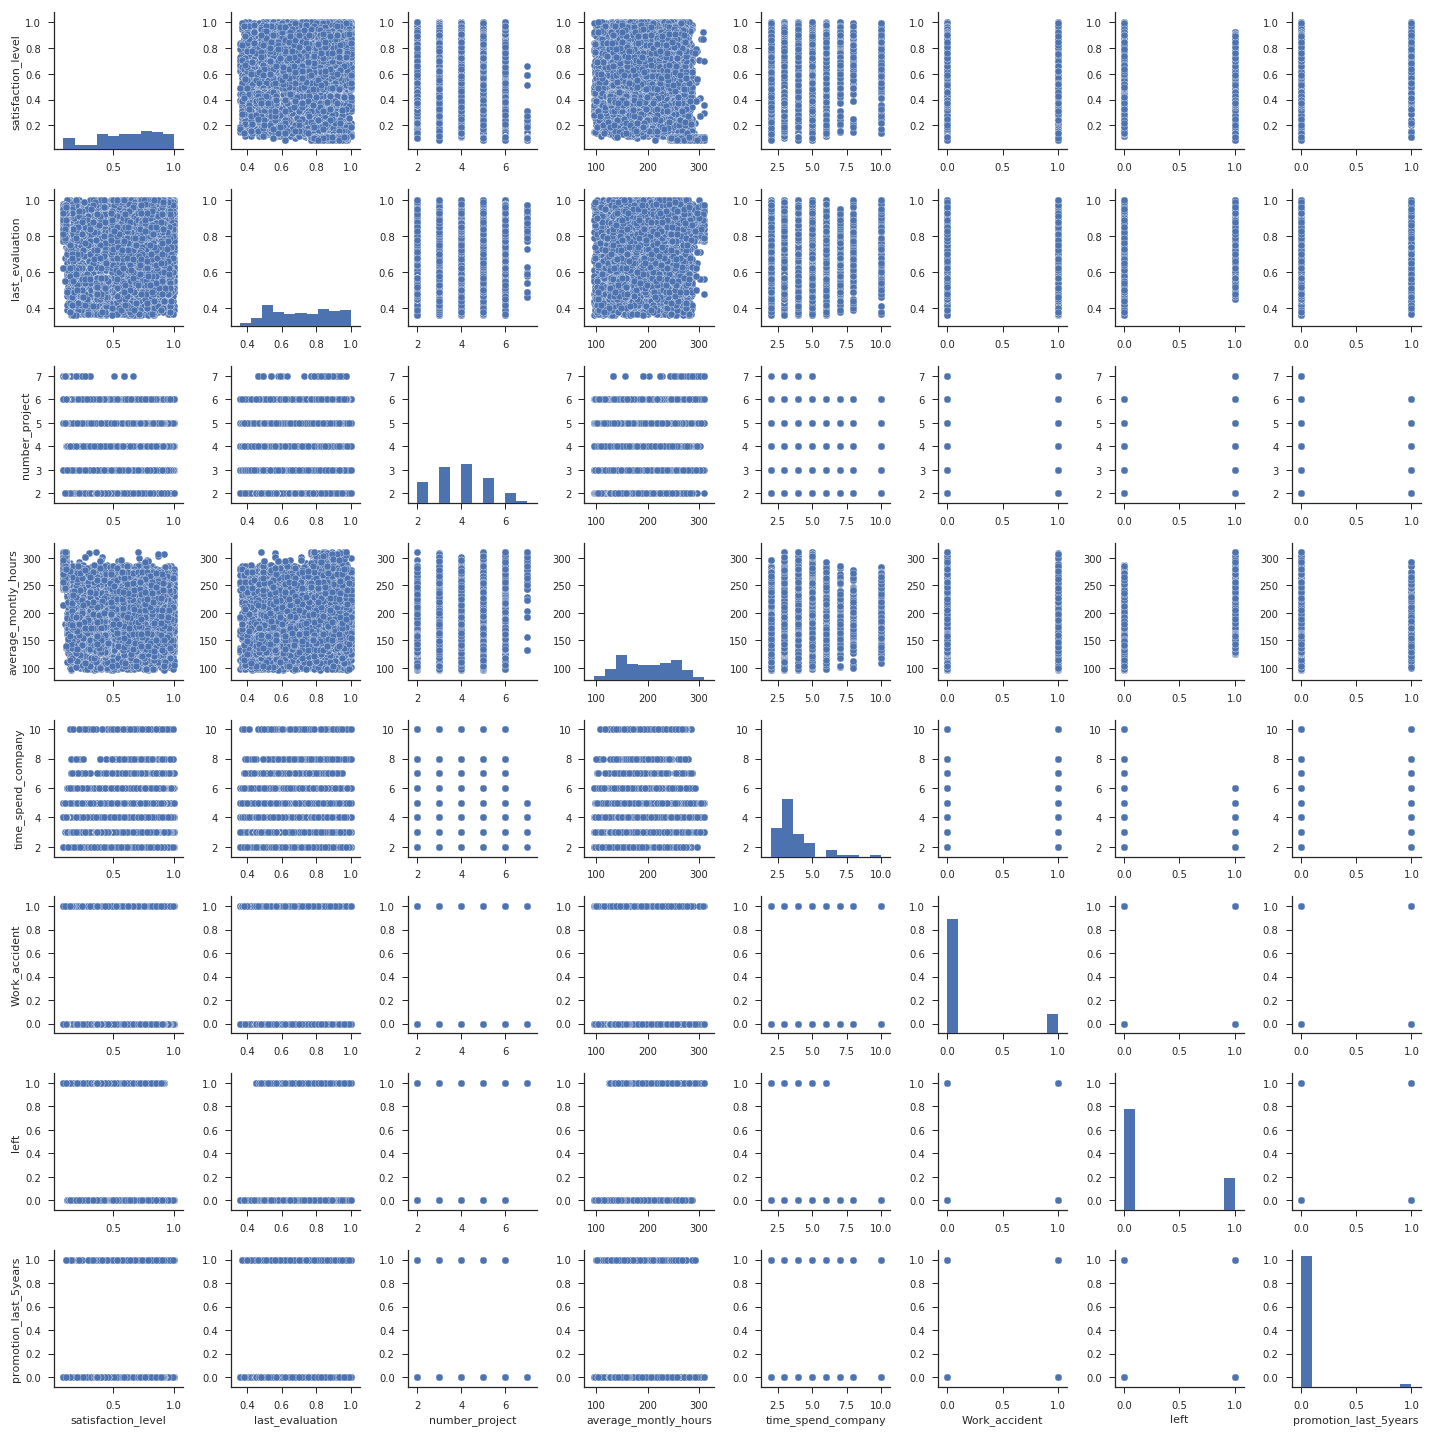

In [6]:
# EDA For XYZ Data
xyz_df = copy.deepcopy(xyz_data)

g = sns.pairplot(xyz_df)
plt.show()

In [7]:
#Employee turn overs
# Overview of summary (Turnover V.S. Non-turnover)
turnover_Summary = xyz_df.groupby('left')
turnover_Summary.mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# Correlation Matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


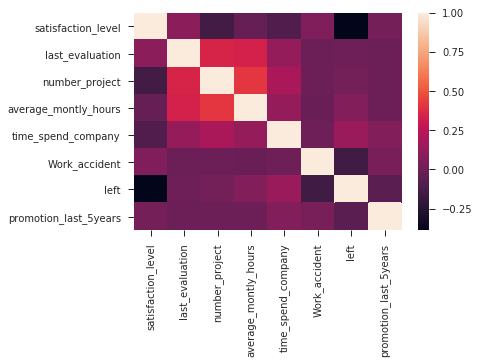

In [8]:
corr = xyz_df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr


## Summary:

 From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

 For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.


## Salary vs TurnOver
### XYZ HR

Text(0.5,1,u'Employee Salary Turnover Distribution')

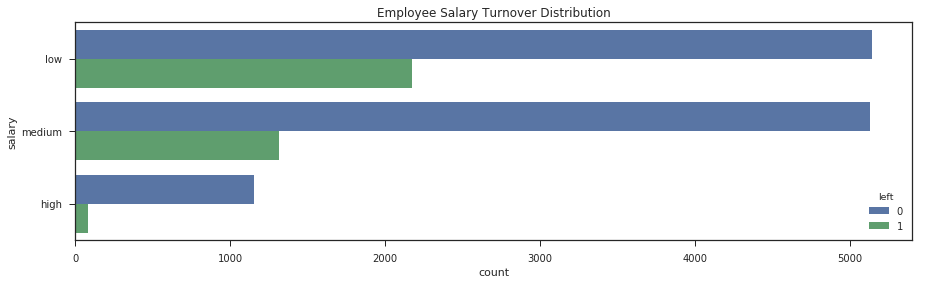

In [9]:

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='left', data=xyz_df).set_title('Employee Salary Turnover Distribution')

### IBM HR


Text(0.5,1,u'Employee Salary Turnover Distribution for IBM')

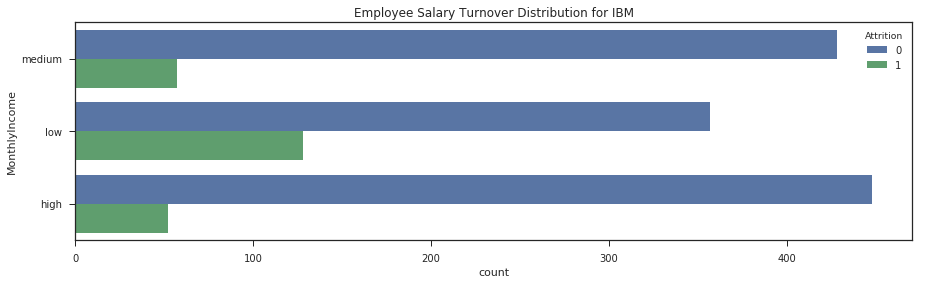

In [25]:
import numpy as np

ibm_cpy = copy.deepcopy(ibm_df)
low_sal = ibm_cpy['MonthlyIncome']

a = np.array(ibm_cpy['MonthlyIncome'])
low_range = np.percentile(a, 33) 
medium_range = np.percentile(a, 66)


def cat_to_sal(sal):
    if sal <= low_range:
        return 'low'
    elif sal >= low_range and sal < medium_range:
        return 'medium'
    elif sal >= medium_range:
        return 'high'
    
incomes = [cat_to_sal(x) for x in ibm_cpy['MonthlyIncome'].values]
ibm_cpy["MonthlyIncome"] = incomes


f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="MonthlyIncome", hue='Attrition', data=ibm_cpy).set_title('Employee Salary Turnover Distribution for IBM')
